In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest1.csv")
df.head(20)

,questio_id,student_answer,score
0,1,الشهادتان الصلاة الزكاة,1.5
1,1,الشهادتان\r\nإقامة الصلاة\r\nاتاء الزكاة\r\nصو...,2.5
2,1,الشهادتان صوم رمضان اقام الصلاة و استاذ الزكاة...,2.5
3,1,5,0.0
4,1,حج بيت الله,0.5
5,1,الشهادتان,0.5
6,1,إقامة الصلاة,0.5
7,1,اتاء الزكاة,0.5
8,1,صوم رمضان,0.5
9,1,الشهادتين و إقامة الصلاة و إيتاء الزكاة و الصو...,2.5


In [44]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   questio_id      112 non-null    int64  
 1   student_answer  112 non-null    object 
 2   score           112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [45]:
df.groupby('score').size()

score
0.0     7
0.5     5
1.0     4
1.5    13
2.0    17
2.5    66
dtype: int64

In [46]:
df.duplicated().sum()

36

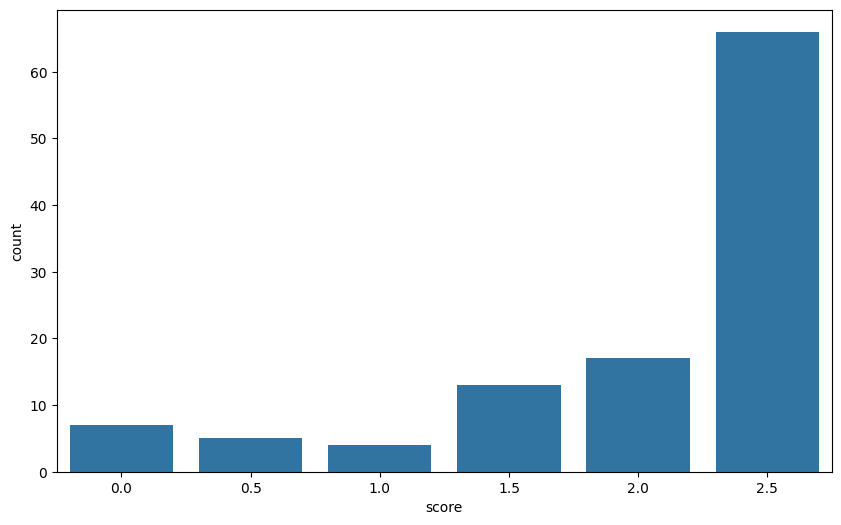

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [48]:
import pandas as pd
df = pd.read_csv('./quest1.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 2 ))
csv = './question1.csv'
df2.to_csv(csv,index=False)
print(len(df1))

76


In [49]:
df = pd.read_csv("question1.csv")
df.head(20)

,questio_id,student_answer,score
0,1,الشهادتان الصلاة الزكاة,3
1,1,الشهادتان\r\nإقامة الصلاة\r\nاتاء الزكاة\r\nصو...,5
2,1,الشهادتان صوم رمضان اقام الصلاة و استاذ الزكاة...,5
3,1,5,0
4,1,حج بيت الله,1
5,1,الشهادتان,1
6,1,إقامة الصلاة,1
7,1,اتاء الزكاة,1
8,1,صوم رمضان,1
9,1,الشهادتين و إقامة الصلاة و إيتاء الزكاة و الصو...,5


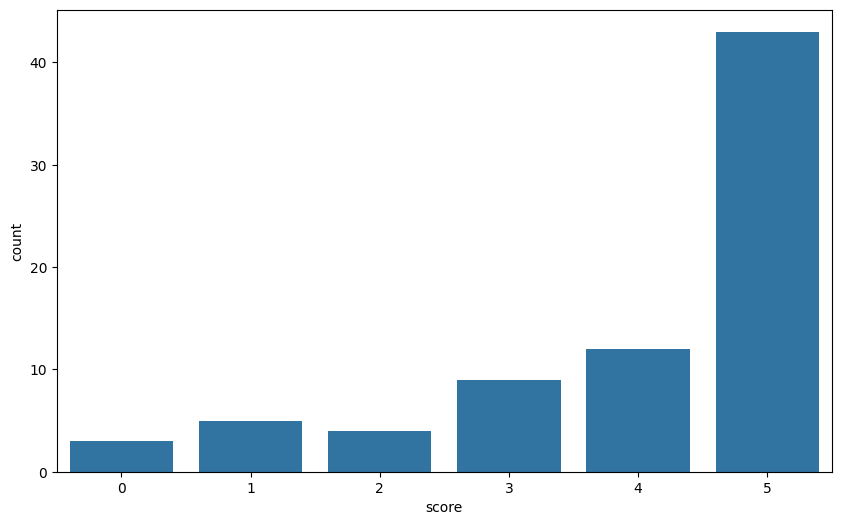

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [51]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [52]:
import nltk
from nltk.tokenize import word_tokenize

In [53]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [54]:
from gensim.models import Word2Vec

In [55]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [56]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [57]:
df.head(5)

,questio_id,student_answer,score,tokens,textvector
0,1,الشهادتان الصلاة الزكاة,3,"[الشهادتان, الصلاة, الزكاة]","[-0.009189297, 0.008121101, 0.004228089, 0.013..."
1,1,الشهادتان\r\nإقامة الصلاة\r\nاتاء الزكاة\r\nصو...,5,"[الشهادتان, إقامة, الصلاة, اتاء, الزكاة, صوم, ...","[-0.024884272, 0.03507526, -0.009846617, 0.004..."
2,1,الشهادتان صوم رمضان اقام الصلاة و استاذ الزكاة...,5,"[الشهادتان, صوم, رمضان, اقام, الصلاة, و, استاذ...","[-0.035151996, 0.037591353, -0.008525656, 0.00..."
3,1,5,0,[5],"[-0.004806648, -0.004173423, -0.0047320845, -0..."
4,1,حج بيت الله,1,"[حج, بيت, الله]","[-0.017609015, 0.02684535, 0.00017831055, -0.0..."
